In [6]:
import pandas as pd

df = pd.read_csv("all_data.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [8]:
# -----------------------------------
# Step 1: Import libraries and load data
# -----------------------------------
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load CSV file into a DataFrame
df = pd.read_csv("all_data.csv")

# Rename columns for easier reference in code
df = df.rename(columns={
    'Country': 'country',
    'Year': 'year',
    'Life expectancy at birth (years)': 'life_expectancy',
    'GDP': 'gdp'
})

# Display first few rows to confirm the structure
df.head()


,country,year,life_expectancy,gdp
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [10]:
# -----------------------------------
# Step 2: Check the number of countries in the dataset
# -----------------------------------
# This helps confirm that we have the expected 6 countries
df['country'].unique()


array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

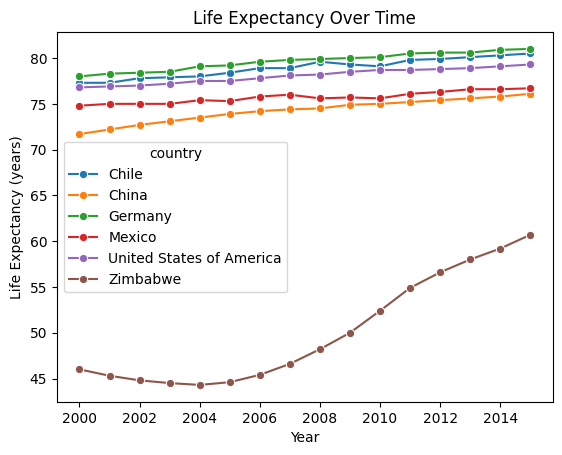

In [12]:
# -----------------------------------
# Step 3: Visualize life expectancy over time
# -----------------------------------
# Line plot shows changes in life expectancy for each country from 2000–2015
# Marker 'o' makes each year's data point visible
sns.lineplot(data=df, x='year', y='life_expectancy', hue='country', marker='o')
plt.title('Life Expectancy Over Time')
plt.ylabel('Life Expectancy (years)')
plt.xlabel('Year')
plt.show()


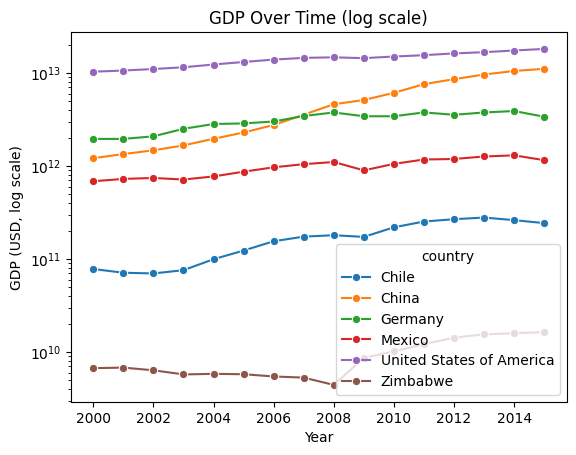

In [14]:
# -----------------------------------
# Step 4: Visualize GDP over time
# -----------------------------------
# GDP varies greatly between countries, so we use a log scale for better comparison
sns.lineplot(data=df, x='year', y='gdp', hue='country', marker='o')
plt.yscale('log')
plt.title('GDP Over Time (log scale)')
plt.ylabel('GDP (USD, log scale)')
plt.xlabel('Year')
plt.show()


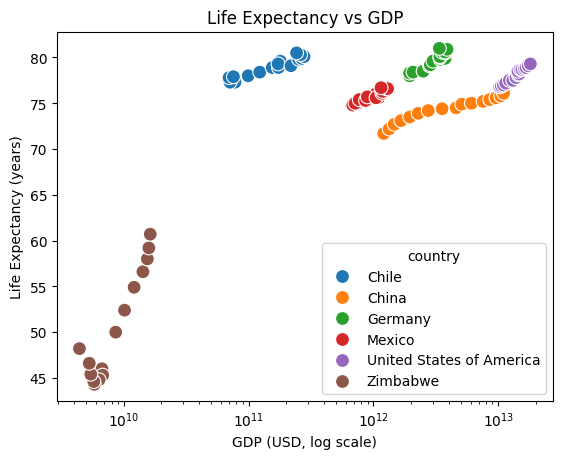

In [16]:
# -----------------------------------
# Step 5: Compare GDP and Life Expectancy
# -----------------------------------
# Scatter plot reveals whether higher GDP is associated with higher life expectancy
# We use a log scale for GDP to spread out values more evenly
sns.scatterplot(data=df, x='gdp', y='life_expectancy', hue='country', s=100)
plt.xscale('log')
plt.xlabel('GDP (USD, log scale)')
plt.ylabel('Life Expectancy (years)')
plt.title('Life Expectancy vs GDP')
plt.show()


In [18]:
# -----------------------------------
# Step 6: Calculate correlation between GDP and life expectancy
# -----------------------------------
# Use log-transformed GDP to account for skew in GDP data
df['log_gdp'] = np.log(df['gdp'])

# Pearson correlation tells us:
# - The strength of the linear relationship (-1 to 1)
# - Whether the correlation is statistically significant (p-value)
corr, pval = stats.pearsonr(df['log_gdp'], df['life_expectancy'])

print(f"Pearson r: {corr:.3f}")
print(f"P-value: {pval:.3e}")


Pearson r: 0.787
P-value: 1.863e-21


# -----------------------------------
# Step 7: Summary
# -----------------------------------

At this point, we can summarize:
- Life expectancy has generally increased over time in all countries
- GDP growth patterns differ, but some show sharp increases
- There is a clear positive relationship between GDP and life expectancy
- Pearson's correlation quantifies that relationship



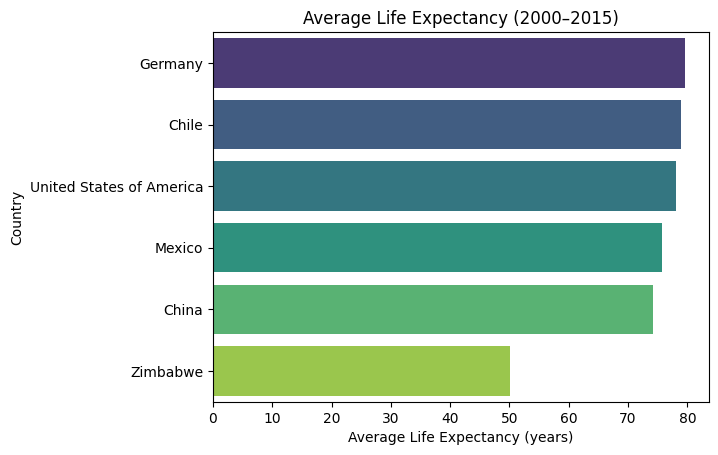

country
Germany                     79.65625
Chile                       78.94375
United States of America    78.06250
Mexico                      75.71875
China                       74.26250
Zimbabwe                    50.09375
Name: life_expectancy, dtype: float64


In [26]:
# -----------------------------------
# Step 8: Average life expectancy per country
# -----------------------------------
avg_life_exp = df.groupby('country')['life_expectancy'].mean().sort_values(ascending=False)

# Display as a bar plot
sns.barplot(
    x=avg_life_exp.values,
    y=avg_life_exp.index,
    hue=avg_life_exp.index,   # use index as hue
    palette="viridis",
    legend=False
)

plt.title('Average Life Expectancy (2000–2015)')
plt.xlabel('Average Life Expectancy (years)')
plt.ylabel('Country')
plt.show()

# Print values for reference
print(avg_life_exp)


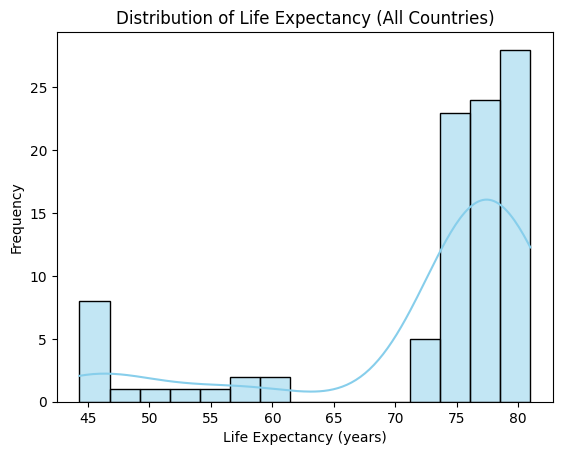

In [24]:
# -----------------------------------
# Step 9: Distribution of life expectancy
# -----------------------------------
# Histogram + KDE shows the spread and shape of life expectancy data across all countries and years
sns.histplot(df['life_expectancy'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Life Expectancy (All Countries)')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.show()


# Conclusion & Key Takeaways:

1. What did you learn throughout the process?
We explored and visualized real-world data combining GDP and life expectancy across six countries over 15 years. The project strengthened skills in data cleaning, aggregation, visualization, and drawing insights from trends and correlations.

2. Are the results what you expected?
Yes, the data showed expected trends: life expectancy and GDP generally increased over time in most countries. The positive correlation between GDP and life expectancy matched common knowledge — wealthier countries tend to have better health outcomes.

3. What are the key findings?

- Life expectancy has steadily improved across the six nations, reflecting progress in healthcare and living conditions.
- GDP growth trends differ by country, with some showing rapid increases and others more stable economies.
- The correlation plot revealed a clear positive relationship between GDP and life expectancy, emphasizing economic factors’ impact on health.
- Distribution analysis showed some variation in life expectancy across countries, indicating disparities that could merit further investigation.